In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from tools_ryu import mytool
from multi_run_v2.initialize_v2 import data_pp, make_market_index, screener

In [2]:
font = {'family': 'serif', 'style': 'italic'}

In [3]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False

In [4]:
cmktcap = pd.read_pickle("Data/cmktcap_data_final.pickle")
cmkt_data = data_pp(cmktcap, vender="coinmarketcap")

In [5]:
mask = screener(mktcap_df=cmkt_data["mktcap"],
                              vol_df=cmkt_data["vol"],
                              mktcap_thresh=1_000_000,
                              vol_thresh=1_000_000,
                              ma=True)

In [6]:
mktcap_1m = mask * cmkt_data["mktcap"]
vol_1m = mask * cmkt_data["vol"]

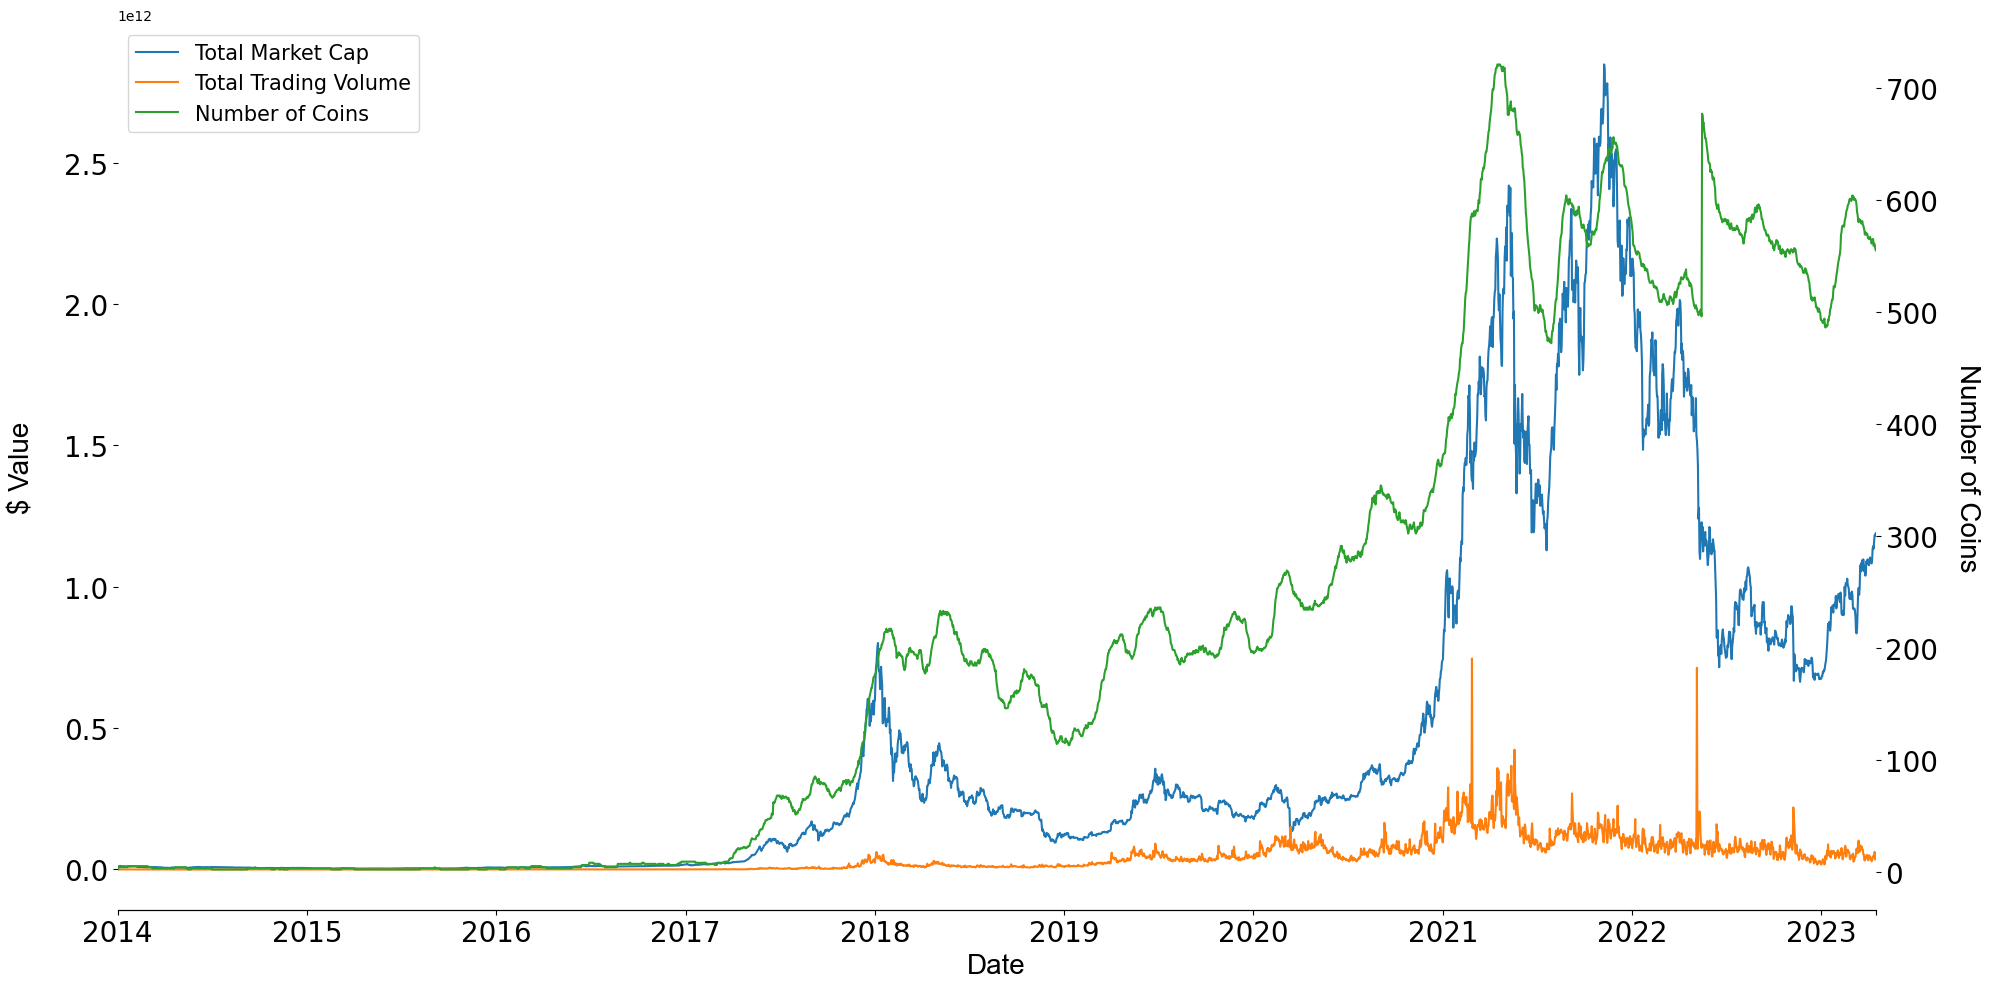

In [12]:
year = "2014"
fig, ax = plt.subplots(1,1, figsize=(24,10))

concat = pd.concat([(mktcap_1m.loc[year:].sum(1)),
                 (vol_1m.loc[year:].sum(1)),
                 mask.loc[year:].count(1)], axis=1,
                keys=["Total Market Cap","Total Trading Volume","Number of Coins"]) 

concat.plot(ax=ax,
            secondary_y="Number of Coins",
            figsize=(20,10),
            fontsize=20,
            legend=False,
            )

plt.ylabel("Number of Coins", fontsize=20, rotation=-90,fontname="Arial")
ax.set_xlabel("Date", fontsize=20, fontname="Arial")
ax.set_ylabel("\$ Value", fontsize=20, fontname="Arial")

# get the lines and labels for primary and secondary y-axis
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax.right_ax.get_legend_handles_labels()

# remove "(right)" from labels
labels2 = [label.replace(' (right)','') for label in labels2]

# add legend without "(right)" for secondary y-axis
ax.legend(lines + lines2, labels + labels2, loc='best', fontsize=15)

plt.gca().yaxis.labelpad = 30
ax.yaxis.labelpad = 20

plt.minorticks_off()
plt.tight_layout()

In [ ]:
(mask).sum(1).loc["2014-12-31":].sort_values()

In [40]:
mkt = make_market_index(cmkt_data["price"],
                        cmkt_data["mktcap"],
                        cmkt_data["vol"],
                        1_000_000,
                        1_000_000,
                        ma=True)

In [41]:
btc = cmkt_data["price"].loc["2013-12-27":,"1"].pct_change().fillna(0)
btc

date
2013-12-27    0.000000
2013-12-28   -0.009849
2013-12-29    0.023659
2013-12-30    0.014872
2013-12-31   -0.002804
                ...   
2023-04-12   -0.011314
2023-04-13    0.016930
2023-04-14    0.002850
2023-04-15   -0.005485
2023-04-16   -0.000104
Name: 1, Length: 3398, dtype: float64

In [42]:
eth = cmkt_data["price"].loc["2015-08-07":,"1027"].pct_change().fillna(0)
eth

date
2015-08-07    0.000000
2015-08-08   -0.728250
2015-08-09   -0.068268
2015-08-10    0.009333
2015-08-11    0.507323
                ...   
2023-04-12    0.013607
2023-04-13    0.049375
2023-04-14    0.044221
2023-04-15   -0.004363
2023-04-16    0.013161
Name: 1027, Length: 2810, dtype: float64

In [43]:
mytool.print_statistics({"mkt":mkt,
                         "BTC":btc,
                         "eth":eth})

,mkt,BTC,eth
CAGR,0.470100,0.492900,1.806800
Mean,0.668960,0.669430,1.558710
STD,0.747010,0.730745,1.155314
MDD,0.893000,0.834000,0.940000
Sharpe,0.895516,0.916093,1.349166


In [ ]:
(mkt+1).loc["2014":].cumprod().plot(figsize=(20,10), fontsize=18, c="blue", alpha=0.8, logy=False)
(btc.loc["2014":]+1).cumprod().plot(figsize=(20,10), fontsize=18, c="red",  alpha=0.8, sharex=True, logy=False)
plt.minorticks_off()
plt.axis()

plt.ylabel("\$ Value of Investment", fontsize=18,fontname="Arial")
plt.xlabel("Date", fontsize=18, fontname="Arial")
plt.legend(["Coin Market", "Bitcoin"], fontsize=18)

plt.gca().yaxis.labelpad = 30

plt.tight_layout();

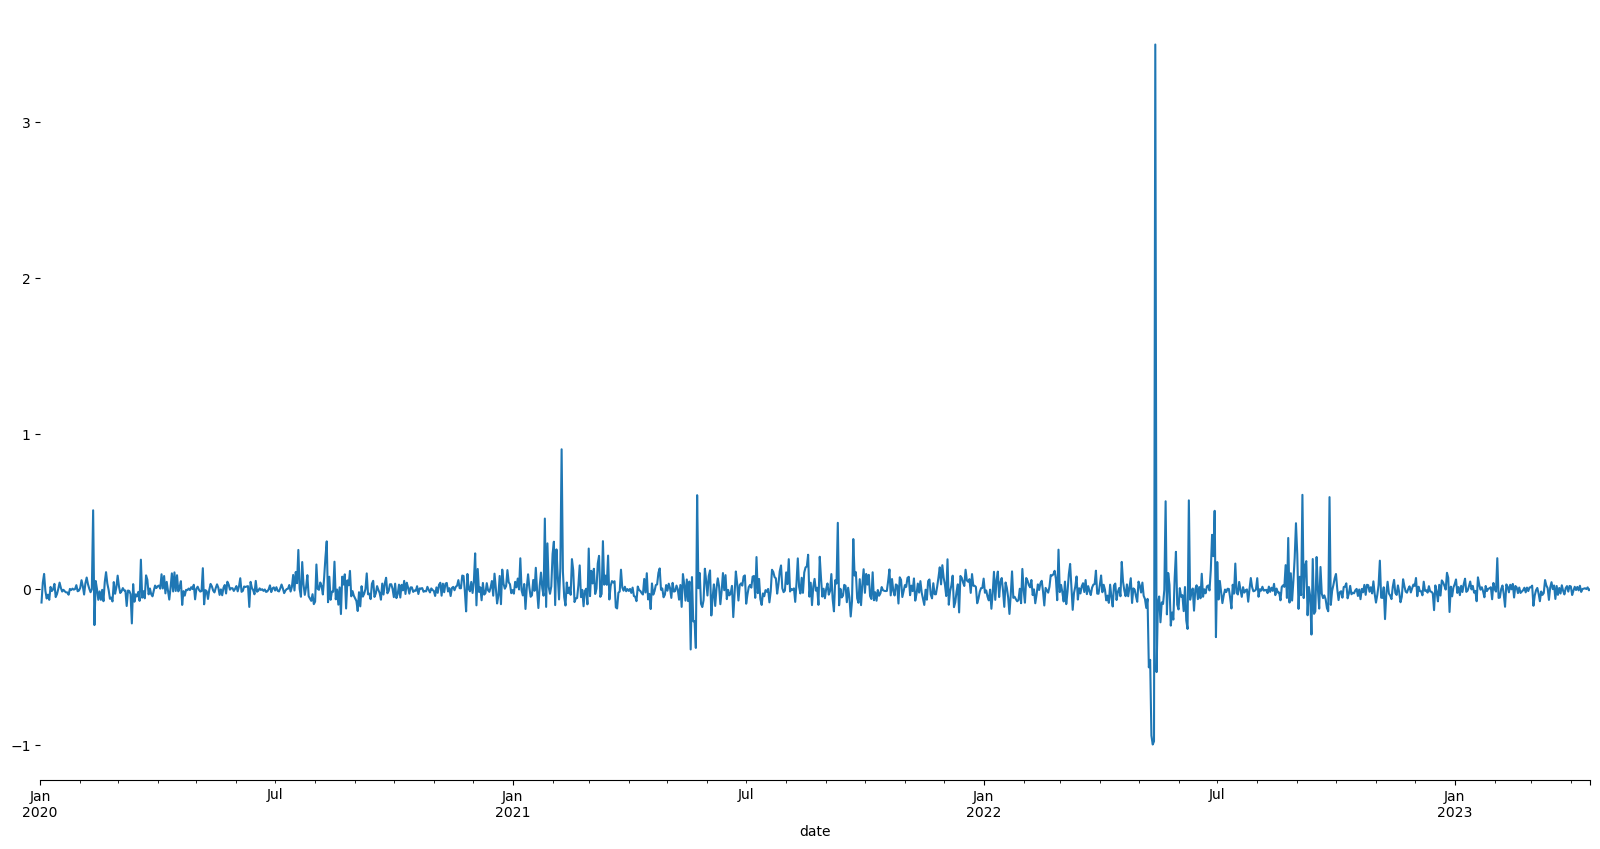

In [44]:
# Terra Luna

cmkt_data["price"].loc["2020":, "4172"].pct_change(fill_method=None).plot(figsize=(20,10));